In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


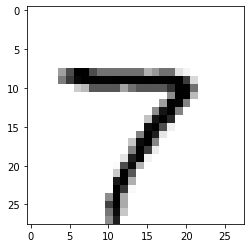

In [27]:
import random 

b = random.choice(x_train)
plt.imshow(b, cmap=plt.cm.binary)

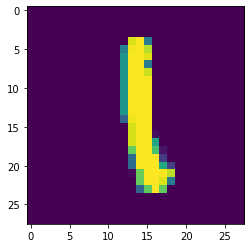

In [30]:
import random 

b = random.choice(x_train)
plt.imshow(b, cmap=None)

<Figure size 432x288 with 0 Axes>

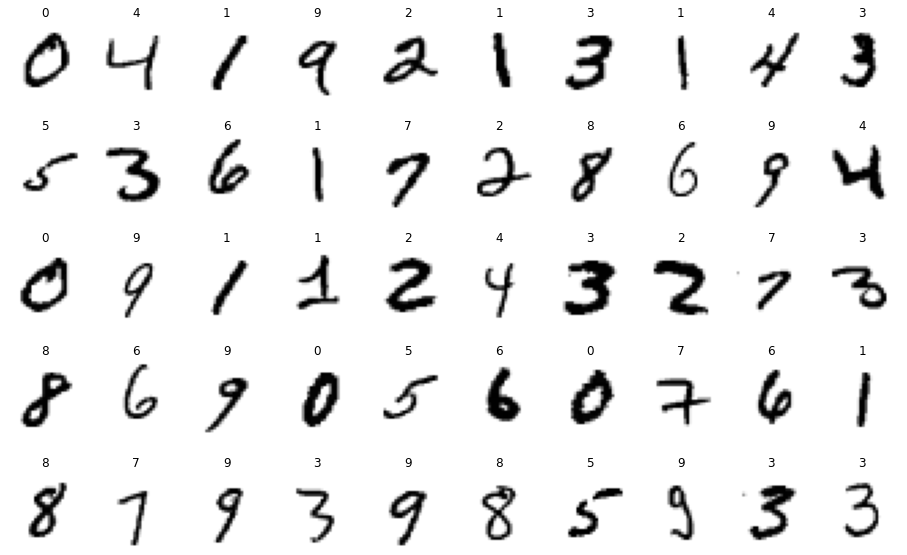

In [31]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50 

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In data preprocessing we need to add an extra dimension which specifies the number of images (in your case 1 image).

This dimension is usually the batch_size. This gives you lot of flexibility when you want to fully utilize modern hardwares such as GPUs as long as your tensor fits in your GPU memory. For example, you can pass 64 images by stacking 64 images along the first dimension. In this case, your 4D array would be of shape (64, width, height, channels).

In [32]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# store the shape of a single image 
input_shape = (28, 28, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
y_test[0].shape

(10,)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001, ),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

You might begin to wonder, why are we using conv 2D on 3 dimensional images ?

2D convolution refers *not* to the dimension of the convolution kernel but to the dimension of the output. The output’s dimension is 2D, single channel. A single 2D convolution pass over a 3D image uses a 3D convolution kernal to obtain the 2D output.

The reason they are called 2D convolution while the data and kernels are 3D is because we only slide the kernel along the x and y axis, not the depth axis. I know it's kinda unintuitive but people are too familiar with it now to change.

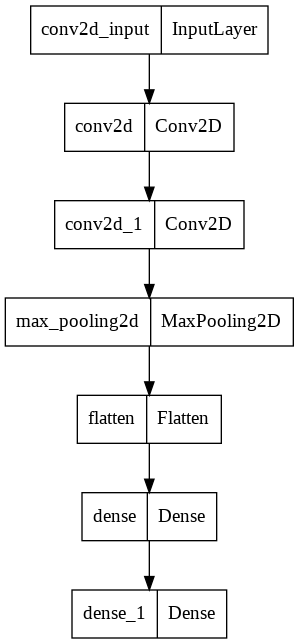

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [50]:
%%time
history = model.fit(x_train,
                    y_train,
                    batch_size = 128,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (x_test, y_test))

#Reduce the steps per epoch and/or validation steps if training and/or validation  takes a lot of time.

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0849 - accuracy: 0.9760
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0840 - accuracy: 0.9758
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0829 - accuracy: 0.9761
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0820 - accuracy: 0.9765
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0810 - accuracy: 0.9768
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0801 - accuracy: 0.9768
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0793 - accuracy: 0.9776
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0783 - accuracy: 0.9777
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0775 - accuracy: 0.9780
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0765 - accuracy: 0.9780

In [51]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9776


In [52]:
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.07088495045900345
Test accuracy: 0.9775999784469604


In [59]:
model_history = history.history

model_history

{'accuracy': [0.9760000109672546,
  0.9757999777793884,
  0.9761000275611877,
  0.9764500260353088,
  0.9767500162124634,
  0.9767666459083557,
  0.9776333570480347,
  0.9776666760444641,
  0.9780333042144775,
  0.9779833555221558,
  0.9778833389282227,
  0.9787166714668274,
  0.9787499904632568,
  0.979033350944519,
  0.9796000123023987,
  0.9798833131790161,
  0.9794166684150696,
  0.9798833131790161,
  0.9800000190734863,
  0.9803333282470703,
  0.9803000092506409,
  0.9805833101272583,
  0.9807000160217285,
  0.9809666872024536,
  0.9814500212669373,
  0.9816833138465881,
  0.9816666841506958,
  0.9818999767303467,
  0.9819166660308838,
  0.982450008392334,
  0.9824333190917969,
  0.982783317565918,
  0.982450008392334,
  0.9830333590507507,
  0.9831166863441467,
  0.9828500151634216,
  0.9832166433334351,
  0.9832333326339722,
  0.9835833311080933,
  0.983299970626831,
  0.9837999939918518,
  0.9838166832923889,
  0.984083354473114,
  0.9841333627700806,
  0.9844333529472351,
  0.

In [62]:
model_history.get('loss')

[0.08486919850111008,
 0.08400839567184448,
 0.08285493403673172,
 0.08202249556779861,
 0.08102702349424362,
 0.08011095225811005,
 0.07927288860082626,
 0.07828298956155777,
 0.07745494693517685,
 0.07653021067380905,
 0.07594887167215347,
 0.0748162791132927,
 0.07416991889476776,
 0.07327201962471008,
 0.07263057678937912,
 0.07163262367248535,
 0.07129427790641785,
 0.07040031254291534,
 0.06964687258005142,
 0.06900657713413239,
 0.06838978826999664,
 0.0675613284111023,
 0.06688904017210007,
 0.06627237051725388,
 0.06567163020372391,
 0.06497709453105927,
 0.06455663591623306,
 0.06366533786058426,
 0.06323526799678802,
 0.06248418241739273,
 0.061671387404203415,
 0.06150941178202629,
 0.06063338369131088,
 0.060269974172115326,
 0.05990331247448921,
 0.059146448969841,
 0.05880012735724449,
 0.05817944183945656,
 0.057639025151729584,
 0.05721203610301018,
 0.0565672293305397,
 0.05607322230935097,
 0.055636245757341385,
 0.05503843352198601,
 0.05437948927283287,
 0.05421172

In [63]:
model_history.get('accuracy')

[0.9760000109672546,
 0.9757999777793884,
 0.9761000275611877,
 0.9764500260353088,
 0.9767500162124634,
 0.9767666459083557,
 0.9776333570480347,
 0.9776666760444641,
 0.9780333042144775,
 0.9779833555221558,
 0.9778833389282227,
 0.9787166714668274,
 0.9787499904632568,
 0.979033350944519,
 0.9796000123023987,
 0.9798833131790161,
 0.9794166684150696,
 0.9798833131790161,
 0.9800000190734863,
 0.9803333282470703,
 0.9803000092506409,
 0.9805833101272583,
 0.9807000160217285,
 0.9809666872024536,
 0.9814500212669373,
 0.9816833138465881,
 0.9816666841506958,
 0.9818999767303467,
 0.9819166660308838,
 0.982450008392334,
 0.9824333190917969,
 0.982783317565918,
 0.982450008392334,
 0.9830333590507507,
 0.9831166863441467,
 0.9828500151634216,
 0.9832166433334351,
 0.9832333326339722,
 0.9835833311080933,
 0.983299970626831,
 0.9837999939918518,
 0.9838166832923889,
 0.984083354473114,
 0.9841333627700806,
 0.9844333529472351,
 0.9843666553497314,
 0.9845666885375977,
 0.9849500060081482

In [64]:
len(model_history.get('loss')), len(model_history.get('accuracy'))

(50, 50)

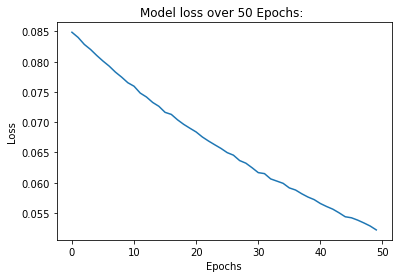

In [69]:
plt.title('Model loss over 50 Epochs: ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(model_history['loss'])

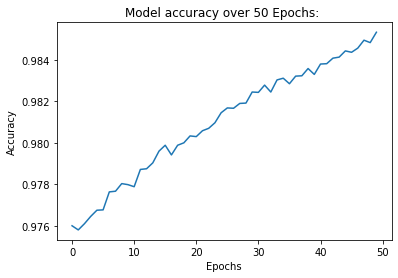

In [68]:
plt.title('Model accuracy over 50 Epochs: ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(model_history['accuracy'])

In [70]:
model.save("mnist_digit_recognition_model.h5")

In [71]:
from google.colab import files
files.download("mnist_digit_recognition_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Its a small model, roughly 5 Mega Bites

In [72]:
from tensorflow.keras.models import load_model

digit_classifier = load_model("mnist_digit_recognition_model.h5")

In [73]:
digit_classifier.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9776


[0.07088495045900345, 0.9775999784469604]

Now we will try to get predictions

In [74]:
pred = np.argmax(digit_classifier.predict(x_test), axis=-1)

In [75]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [77]:
# digit_classifier.predict(random.choice(x_test))

# This will throw an error because we need to add an extra dimension to our input image


digit_classifier.predict(random.choice(x_test).reshape(1, 28, 28, 1))

array([[7.3377920e-10, 1.2392802e-10, 6.1200371e-06, 2.0731984e-06,
        9.9993432e-01, 2.2845333e-07, 3.7985828e-08, 1.9833971e-07,
        2.6460117e-05, 3.0466737e-05]], dtype=float32)

This gives us an array of 

1. another array of all the predicted probabilities of that image for every class
2. the data type of that probability array

In [79]:
len(digit_classifier.predict(random.choice(x_test).reshape(1, 28, 28, 1))[0])

10

As we have 10 classes so this model has given us an array which contains predicted probabilities for every class.

In [85]:
np.argmax(digit_classifier.predict(random.choice(x_test).reshape(1, 28, 28, 1)))

9